# INDEX

##### 1. Extracting data from 20_newsgroups.
##### 2. Creating dictionary for Naive Bayes and analysis of data.
##### 3. Creating datasets.
##### 4. Using SKLearn MultinomialNB for prediction.
##### 5. Implementing own algorithm for Multinomial NB and testing.
##### 6. Comparing Results.

### ----------------------------------------------------------------------------------------------------------------------------

### Extracting data from 20_newsgroups.

In [1]:
# First we get a list of stop words from internet to prevent use of common words.

stop_word = ["a", "about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before",
             "being","below","between","both","but","by","could","did","do","does","doing","down","during","each","few","for","from",
             "further","had","has","have","having","he","he'd","he'll","he's","her","here","here's","hers","herself","him","himself",
             "his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
             "more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over",
             "own","same","she","she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs",
             "them","themselves","then","there","there's","these","they","they'd","they'll","they're","they've","this","those","through",
             "to","too","under","until","up","very","was","we","we'd","we'll","we're","we've","were","what","what's","when","when's",
             "where","where's","which","while","who","who's","whom","why","why's","with","would","you","you'd","you'll","you're",
             "you've","your","yours","yourself","yourselves"]

In [2]:
# Importing necessary libraries for file extraction and model_selection.

import numpy as np
import pandas as pd
import operator
import os
import sys
from sklearn import model_selection
import re
import string

In [3]:
# X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
# Y is the category
X = [] 
Y = []
for category in os.listdir("20_newsgroups"):
    for document in os.listdir("20_newsgroups/" + category):
        with open("20_newsgroups/" + category + '/' + document ,"r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
# Checking type of X and Y
print(type(X))
print(type(X[0]))
print(type(Y))

# Printing first element of X to analyse.
print(X[0])

'''Hence, X is a tuple with first element as name of doc and second as the content of the document.'''

<class 'list'>
<class 'tuple'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheis

'Hence, X is a tuple with first element as name of doc and second as the content of the document.'

### ----------------------------------------------------------------------------------------------------------------------------

### Creating a dictionary and analysing data.

In [5]:
# Splitting the data in training and testing.
# Random state is used to prevent discrepencies in testing.

x_train,x_test,y_train,y_test = model_selection.train_test_split(X, Y, random_state = 0)
print(len(x_train))
print(len(x_test))

14997
5000


In [6]:
'''We will use re.split functionality to split document in words and store it.'''

dic = {}
for i in range(len(x_train)):
    # Take X[i][1] for the text. X[i][0] contains categories.
    # Convert all words to lowercase to prevent mismatch with lowercase stop words.
    words = x_train[i][1].lower()
    final_list = re.split(r'\W+', words)
    # Go through each word and add in dictionary.
    # If already present increase frequency.
    # If it is a stopp word, don't add.
    for s in final_list:
        if not(s.isalpha()) or (s in stop_word) or (len(s) <= 2):
            continue
        elif s in dic:
            dic[s] += 1
        else:
            dic[s] = 1

In [9]:
'''Now we sort the dictionary according to the frequency of words in descending order.'''

sorted_dic = sorted(dic.items(), key = operator.itemgetter(1), reverse=True)

<function matplotlib.pyplot.show(*args, **kw)>

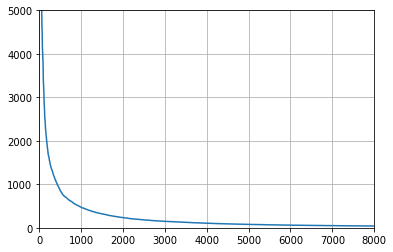

In [10]:
# We will now use matplotlib to analyse the data in the dictionary.

import matplotlib.pyplot as plt

f = sorted_dic
num_words = []
freq = []
for i in range(len(f)):
    num_words.append(i)
    freq.append(f[i][1])
plt.plot(num_words, freq)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show

In [11]:
'''I decided to use the top 2000 words for the best result'''

feat = [f[i][0] for i in range(2000)]
print(feat)

['edu', 'cmu', 'com', 'news', 'not', 'srv', 'cantaloupe', 'net', 'message', 'subject', 'lines', 'date', 'apr', 'path', 'newsgroups', 'organization', 'can', 'state', 'gmt', 'ohio', 'one', 'will', 'writes', 'article', 'comp', 'references', 'talk', 'misc', 'ans', 'howland', 'sender', 'reston', 'don', 'people', 'like', 'university', 'just', 'posting', 'nntp', 'mps', 'know', 'host', 'sci', 'get', 'zaphod', 'think', 'usenet', 'may', 'alt', 'politics', 'windows', 'also', 'time', 'rutgers', 'harvard', 'use', 'near', 'eng', 'new', 'rec', 'good', 'sei', 'crabapple', 'noc', 'xref', 'soc', 'system', 'das', 'well', 'now', 'cis', 'max', 'even', 'see', 'god', 'religion', 'europa', 'gtefsd', 'org', 'world', 'uunet', 'ece', 'way', 'say', 'make', 'christian', 'two', 'many', 'gov', 'much', 'first', 'rochester', 'right', 'distribution', 'club', 'andrew', 'mail', 'space', 'gatech', 'magnesium', 'anyone', 'want', 'reply', 'utexas', 'udel', 'used', 'culture', 'said', 'sys', 'sun', 'need', 'ibm', 'work', 'uiu

### ----------------------------------------------------------------------------------------------------------------------------

### Creating Datasets

In [12]:
# We will create a dataset for both X_train and X_test. It will be m * n table with words as columns and data points as frequency
# of those words.
# Y_train and Y_test will contai the categories of the newsgroups.

X_train = np.zeros([len(x_train), len(feat)], int)
for i in range(len(x_train)):
    words = x_train[i][1].lower()
    word = re.split(r'\W+',words)
    # Iterating over each word
    for j in word:
        # We will add the frequency corresponding to that word only which is in our features list (feat)
        if j in feat:
            X_train[i][feat.index(j)] += 1

In [14]:
X_test = np.zeros([len(x_test), len(feat)], int)
for i in range(len(x_test)):
    words = x_test[i][1].lower()
    word = re.split(r'\W+',words)
    # Iterating over each word
    for j in word:
        # We will add the frequency corresponding to that word only which is in our features list (feat)
        if j in feat:
            X_test[i][feat.index(j)] += 1

In [15]:
print(X_train)
print()
print()
print(X_test)

[[ 9  2  3 ...  0  0  0]
 [ 4  1  4 ...  0  0  0]
 [ 2  2  8 ...  0  0  0]
 ...
 [ 5  1  6 ...  0  0  0]
 [ 9  3  0 ...  0  0  0]
 [13  1  1 ...  0  0  0]]


[[ 9  4  0 ...  0  0  0]
 [ 7  4  7 ...  0  0  0]
 [10  3  8 ...  0  0  0]
 ...
 [ 2  1  7 ...  0  0  0]
 [17  3  0 ...  0  0  0]
 [ 3  1  0 ...  0  0  0]]


### ----------------------------------------------------------------------------------------------------------------------------

### Using SKLearn MultinomialNB for prediction.

In [16]:
'''Using inbult Multinomial Naive Bayes for prediction.'''

from sklearn.naive_bayes import MultinomialNB

clf1 = MultinomialNB()
clf1.fit(X_train, y_train)
Y_pred1 = clf1.predict(X_test)
print(Y_pred1)

['comp.windows.x' 'sci.med' 'talk.politics.guns' ... 'rec.motorcycles'
 'alt.atheism' 'rec.sport.hockey']


In [17]:
'''Using confusion matrix and classification report to test the accuracy and analyse
   performance of algorithm.'''

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_pred1, y_test))
print()
print()
print(confusion_matrix(Y_pred1, y_test))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.82      0.82       232
           comp.graphics       0.80      0.82      0.81       245
 comp.os.ms-windows.misc       0.78      0.84      0.81       229
comp.sys.ibm.pc.hardware       0.82      0.68      0.74       289
   comp.sys.mac.hardware       0.86      0.75      0.80       270
          comp.windows.x       0.70      0.87      0.78       195
            misc.forsale       0.89      0.82      0.86       283
               rec.autos       0.92      0.89      0.90       279
         rec.motorcycles       0.96      0.91      0.94       302
      rec.sport.baseball       0.92      0.93      0.92       244
        rec.sport.hockey       0.97      0.93      0.94       241
               sci.crypt       0.96      0.96      0.96       234
         sci.electronics       0.87      0.87      0.87       243
                 sci.med       0.85      0.93      0.89       234
         

### ----------------------------------------------------------------------------------------------------------------------------

### Using Self Implemented MultinomialNB for prediction.

In [18]:
#Making dictionary for implementing Naive Baye's
def fit(X_train,y_train):
    count = {}
    total_word = 0
    y_train = np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"] = len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i = X_train[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in feat:
            #Calculating total word in feature
            l=(x_train_with_i[:,feat.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
    return count

In [19]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [22]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [20]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [23]:
#This cell will take time to execute
dictionary = fit(X_train,y_train)
y_pred2 = predict_(X_test,dictionary)

In [24]:
'''Using confusion matrix and classification report to test the accuracy and analyse
   performance of algorithm.'''

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred2))
print()
print()
print(confusion_matrix(y_test, y_pred2))

                          precision    recall  f1-score   support

             alt.atheism       0.78      0.88      0.82       233
           comp.graphics       0.75      0.83      0.79       253
 comp.os.ms-windows.misc       0.89      0.69      0.77       249
comp.sys.ibm.pc.hardware       0.70      0.85      0.76       240
   comp.sys.mac.hardware       0.82      0.88      0.85       236
          comp.windows.x       0.88      0.76      0.82       240
            misc.forsale       0.83      0.89      0.86       261
               rec.autos       0.95      0.93      0.94       269
         rec.motorcycles       0.95      0.99      0.97       284
      rec.sport.baseball       0.96      0.95      0.96       248
        rec.sport.hockey       0.96      0.98      0.97       231
               sci.crypt       0.96      0.96      0.96       233
         sci.electronics       0.89      0.93      0.91       244
                 sci.med       0.95      0.92      0.93       256
         

In [25]:
'''My classifier gives an accuracy of 0.87 compared to 0.86 of SKLearn. Both perform well.'''

'My classifier gives an accuracy of 0.87 compared to 0.86 of SKLearn. Both perform well.'